In [7]:
import pandas
import numpy
from RexR import *
import _helpers
Rocket = RexR(datalocation = None, #'_data/genomic_data/data.pkl', 
              seed = 3123, 
              debug = False, 
              write_out=True,
              set_name = 'ALL_10') # data to read in ALL_10, or MELA
Rocket.load_probeset_data();

%matplotlib inline
%load_ext autoreload
%autoreload 2

++++++++++++++++++++++++++++++ Firing up RexR! ++++++++++++++++++++++++++++++
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Classification

In [44]:
METHOD_LIST = ['ensemble'] #,'XGB', 'LGBM', 'ExtraTrees','SVM', 'LR', 'MLNN', 'DNN']#, 'CNN'] #, 'NaiveBayes','MLNN', 'XGB'] # 
Runs = []
nruns = 10
SCALER = "standard" # None, minmax, standard, normaliser, add robust?
SCALER_MAXABS = False # scale by maximum absolute valuesSCALER
SCALER_BIAS_REMOVAL = True
GROUPING = "mean"
FEAT_SELECTOR =  "low_variance" # "low_variance" None
SELECTOR_METHOD = "FDR" # mannwhitney, FDR
SCORE_FUNC = 'ANOVA' # ANOVA, chi2
SELECTOR_ALPHA = 0.1 # see this as the maximum p-value to classify 
DIM_TYPE =  None #"PCA" #"LDA", "PCA", "PLS" 
DIM_NUM = 300
Results = None
ACC = pd.DataFrame()
Rocket.VIZ = True
Rocket.DATA_merged_processed = None
PREPROC_DICT = {"patient_grouping": GROUPING, "bias_removal": SCALER_BIAS_REMOVAL, "noise": False}
FSELECT_DICT = {"type": FEAT_SELECTOR, "pvalue": SELECTOR_ALPHA, 
                "method": SELECTOR_METHOD, "score_function": SCORE_FUNC}
DIMRED_DICT = {"type": DIM_TYPE, "n_comp": DIM_NUM}
PIPELINE = {"scaler": {"type": SCALER, "maxabs": SCALER_MAXABS},
            "pre_processing": PREPROC_DICT,
            "feature_selection": FSELECT_DICT, # mannwhitney         
            "dim_reduction": DIMRED_DICT}
Rocket.PIPELINE_PARAMETERS = PIPELINE

In [43]:
processed_df = _helpers._preprocess(Rocket.DATA_merged, cohorts = ["cohort 1", "JB", "IA", "ALL-10"], 
                                      scaler = SCALER , Rclass = Rocket)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Removing cohort biases


KeyboardInterrupt: 

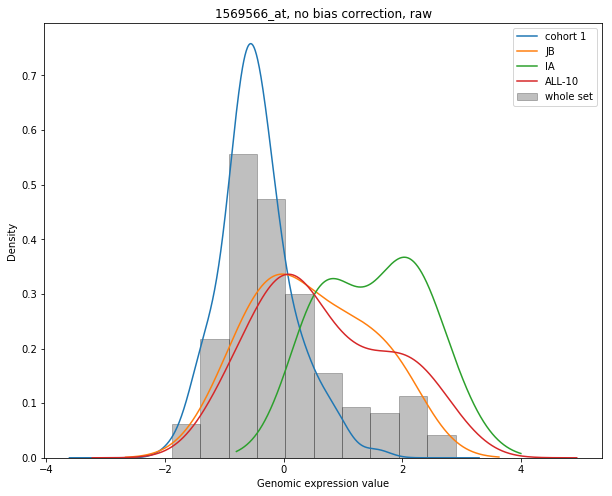

In [23]:
# array-batch
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
ch = Rocket.DATA_merged["array-batch"].isin(["cohort 1", "JB", "IA", "ALL-10"])

#Rocket.DATA_merged.loc[ch,'1569566_at'].plot.kde(color = 'blue')
Rocket.DATA_merged.loc[ch,'1569566_at'].plot.hist(label='whole set', alpha=0.25, 
                                                        density=True, color='black', ec='black')
Rocket.DATA_merged.ix[Rocket.DATA_merged['array-batch']=='cohort 1']['1569566_at'].plot.kde(label='cohort 1')
Rocket.DATA_merged.ix[Rocket.DATA_merged['array-batch']=='JB']['1569566_at'].plot.kde(label='JB')
Rocket.DATA_merged.ix[Rocket.DATA_merged['array-batch']=='IA']['1569566_at'].plot.kde(label='IA')
Rocket.DATA_merged.ix[Rocket.DATA_merged['array-batch']=='ALL-10']['1569566_at'].plot.kde(label='ALL-10')
plt.title('1569566_at, no bias correction, raw')
plt.xlabel('Genomic expression value')
plt.legend()
plt.savefig('out/genome_distribution_noCorrection_noNormalisation.png', 
                            format='png', dpi=600, transparant=True)



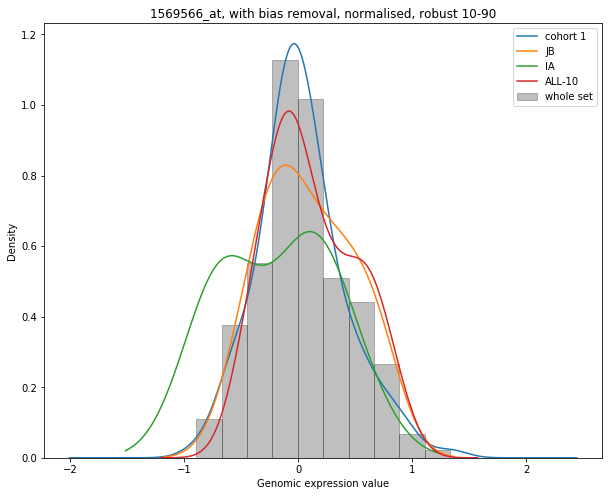

In [39]:
plt.figure(figsize=(10,8))
ch = processed_df["array-batch"].isin(["cohort 1", "JB", "IA", "ALL-10"])
#processed_df.loc[ch, '1569566_at'].plot.kde(label='whole set')
processed_df.loc[ch, '1569566_at'].plot.hist(label='whole set', alpha=0.25, 
                                                 density=True, color='black', ec='black')
processed_df.ix[processed_df['array-batch']=='cohort 1']['1569566_at'].plot.kde(label='cohort 1')
processed_df.ix[processed_df['array-batch']=='JB']['1569566_at'].plot.kde(label='JB')
processed_df.ix[processed_df['array-batch']=='IA']['1569566_at'].plot.kde(label='IA')
processed_df.ix[processed_df['array-batch']=='ALL-10']['1569566_at'].plot.kde(label='ALL-10')
plt.title('1569566_at, with bias removal, normalised, robust 10-90')
plt.xlabel('Genomic expression value')
plt.legend()
plt.savefig('out/strong_genome_distribution_withCorrection_robustNormalisation10-90.png', 
                format='png', dpi=600, transparant=True)

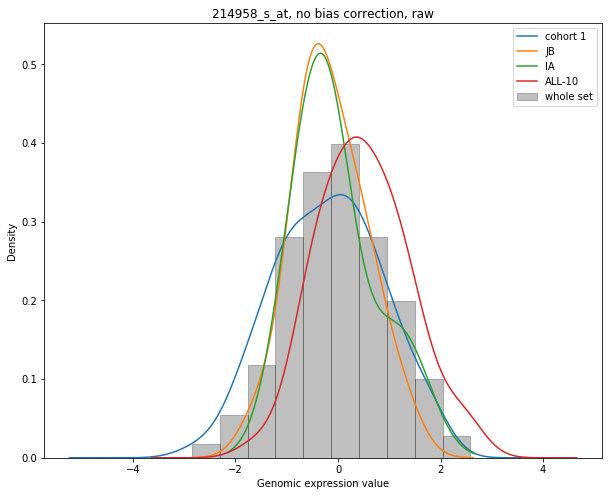

In [25]:
plt.figure(figsize=(10,8))
ch = Rocket.DATA_merged["array-batch"].isin(["cohort 1", "JB", "IA", "ALL-10"])

#Rocket.DATA_merged.loc[ch, '214958_s_at'].plot.kde(label='whole set')
Rocket.DATA_merged.loc[ch,'214958_s_at'].plot.hist(label='whole set', alpha=0.25, 
                                                        density=True, color='black', ec='black')
Rocket.DATA_merged.ix[Rocket.DATA_merged['array-batch']=='cohort 1']['214958_s_at'].plot.kde(label='cohort 1')
Rocket.DATA_merged.ix[Rocket.DATA_merged['array-batch']=='JB']['214958_s_at'].plot.kde(label='JB')
Rocket.DATA_merged.ix[Rocket.DATA_merged['array-batch']=='IA']['214958_s_at'].plot.kde(label='IA')
Rocket.DATA_merged.ix[Rocket.DATA_merged['array-batch']=='ALL-10']['214958_s_at'].plot.kde(label='ALL-10')
#Rocket.DATA_merged['200934_at'].plot.kde(label='200934_at')
#Rocket.DATA_merged['207908_at'].plot.kde(label='207908_at')
#Rocket.DATA_merged['205107_s_at'].plot.kde(label='205107_s_at')
#Rocket.DATA_merged['243806_at'].plot.kde(label='243806_at')
plt.title('214958_s_at, no bias correction, raw')
plt.xlabel('Genomic expression value')
plt.legend()
plt.savefig('out/weak_genome_distribution_noCorrection_noNormalisation.png', 
                            format='png', dpi=600, transparant=True)

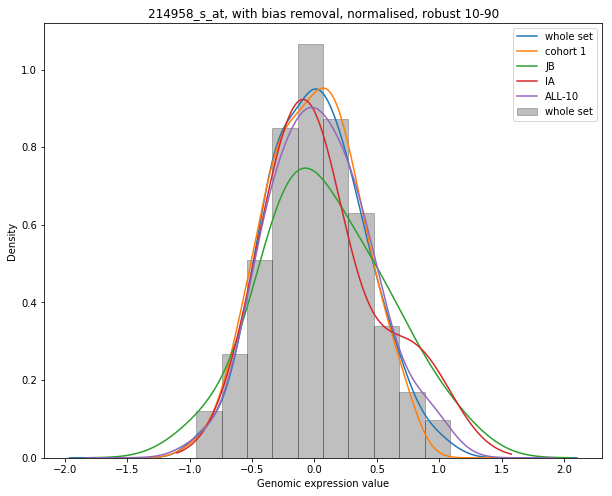

In [40]:
plt.figure(figsize=(10,8))
ch = processed_df["array-batch"].isin(["cohort 1", "JB", "IA", "ALL-10"])

processed_df.loc[ch, '214958_s_at'].plot.kde(label='whole set')
processed_df.loc[ch,'214958_s_at'].plot.hist(label='whole set', alpha=0.25, 
                                                        density=True, color='black', ec='black')
processed_df.ix[processed_df['array-batch']=='cohort 1']['214958_s_at'].plot.kde(label='cohort 1')
processed_df.ix[processed_df['array-batch']=='JB']['214958_s_at'].plot.kde(label='JB')
processed_df.ix[processed_df['array-batch']=='IA']['214958_s_at'].plot.kde(label='IA')
processed_df.ix[processed_df['array-batch']=='ALL-10']['214958_s_at'].plot.kde(label='ALL-10')
#Rocket.DATA_merged['200934_at'].plot.kde(label='200934_at')
#Rocket.DATA_merged['207908_at'].plot.kde(label='207908_at')
#Rocket.DATA_merged['205107_s_at'].plot.kde(label='205107_s_at')
#Rocket.DATA_merged['243806_at'].plot.kde(label='243806_at')
plt.title('214958_s_at, with bias removal, normalised, robust 10-90')
plt.xlabel('Genomic expression value')
plt.legend()
plt.savefig('out/weak_genome_distribution_withCorrection_robustNormalisation10-90.png', 
                            format='png', dpi=600, transparant=True)

In [19]:
df= Rocket.DATA_merged

In [21]:
df.isna().sum().sum()

1749816

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Prepping data, this may take a while..
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Removing cohort biases
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Grouping probesets
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Selecting features using a low_variance filter
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Kept 524 of 54613 features using FDR with p = 0.1
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


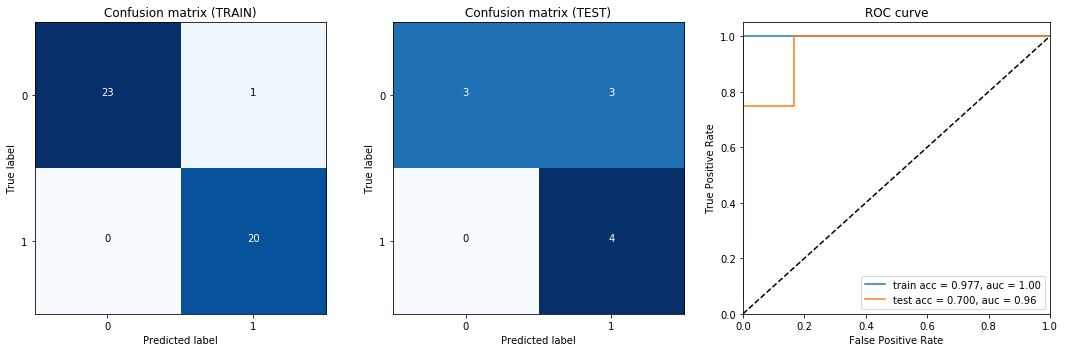

MODEL: RF accuracy:  0.7592592592592595 +/-: 0.015949619653323352
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.77      0.80      0.79        30
          1       0.74      0.71      0.72        24

avg / total       0.76      0.76      0.76        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


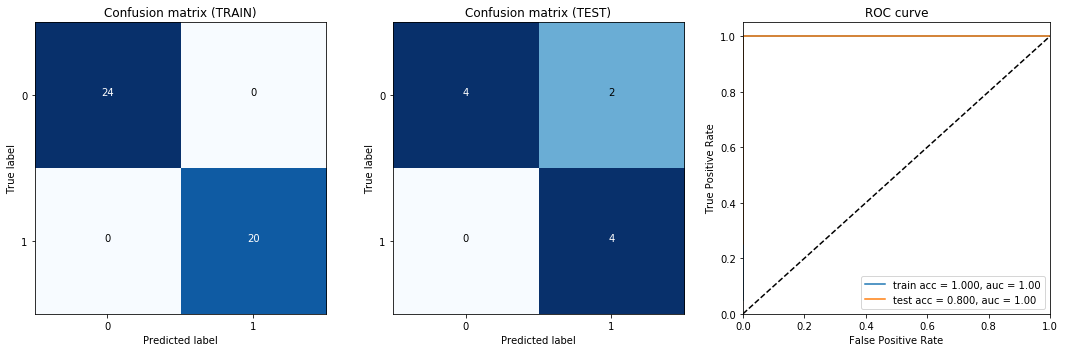

MODEL: RF accuracy:  0.796296296296296 +/-: 0.011366753959346556
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.81      0.83      0.82        30
          1       0.78      0.75      0.77        24

avg / total       0.80      0.80      0.80        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


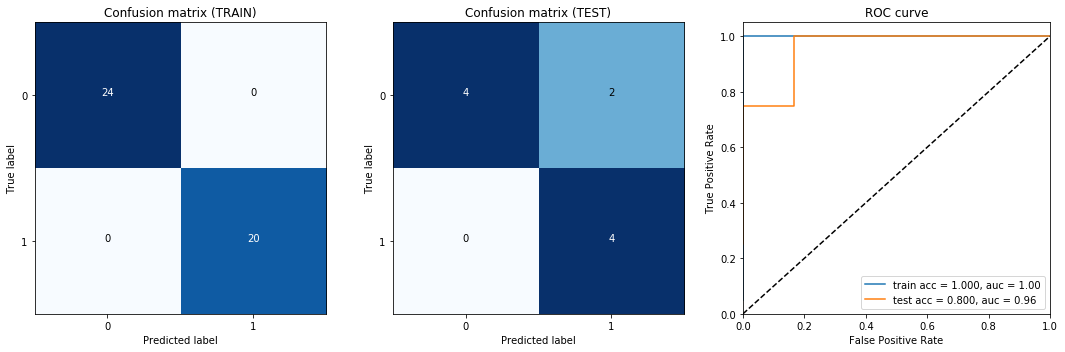

MODEL: RF accuracy:  0.7777777777777776 +/-: 0.01526374859708193
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.78      0.83      0.81        30
          1       0.77      0.71      0.74        24

avg / total       0.78      0.78      0.78        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


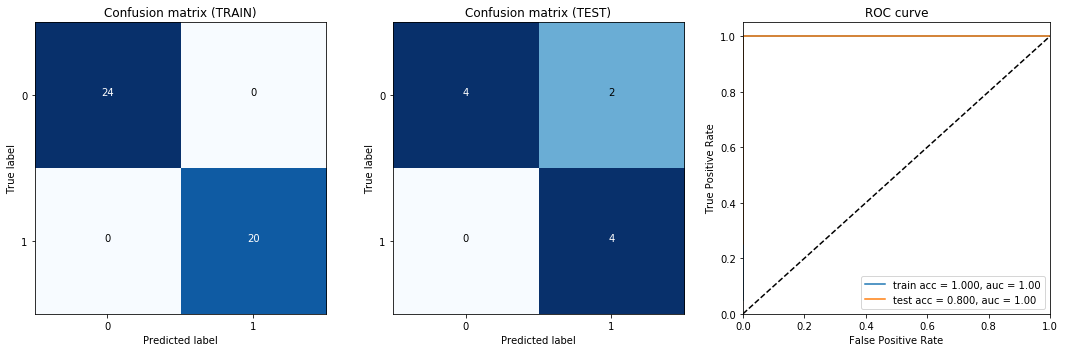

MODEL: RF accuracy:  0.796296296296296 +/-: 0.011366753959346556
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.81      0.83      0.82        30
          1       0.78      0.75      0.77        24

avg / total       0.80      0.80      0.80        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


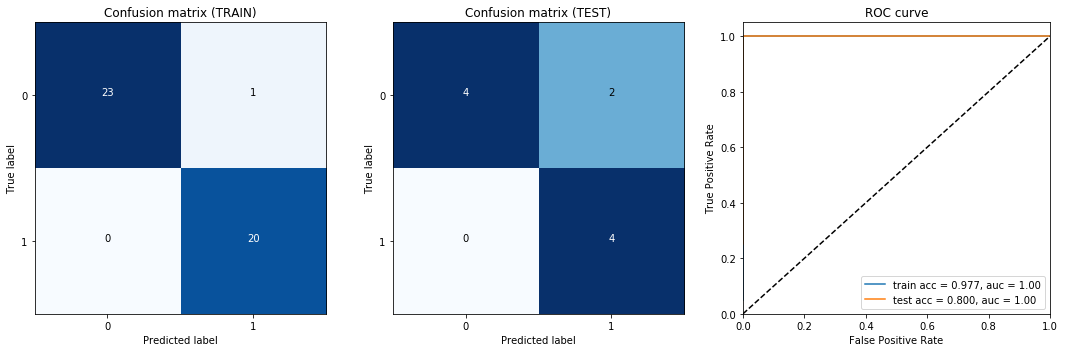

MODEL: RF accuracy:  0.796296296296296 +/-: 0.011366753959346556
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.81      0.83      0.82        30
          1       0.78      0.75      0.77        24

avg / total       0.80      0.80      0.80        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


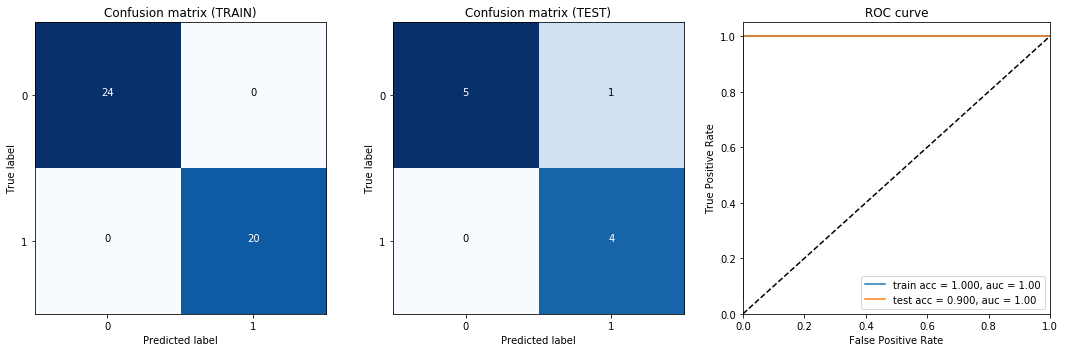

MODEL: RF accuracy:  0.8148148148148147 +/-: 0.01301284449432597
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.81      0.87      0.84        30
          1       0.82      0.75      0.78        24

avg / total       0.82      0.81      0.81        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


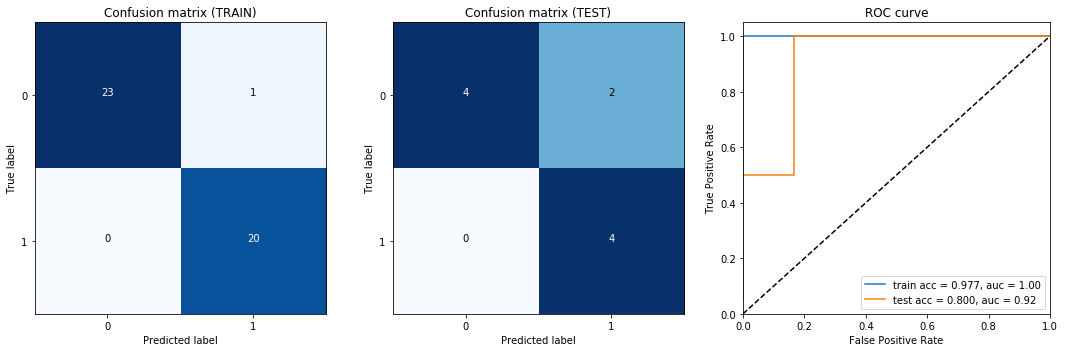

MODEL: RF accuracy:  0.796296296296296 +/-: 0.011366753959346556
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.81      0.83      0.82        30
          1       0.78      0.75      0.77        24

avg / total       0.80      0.80      0.80        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


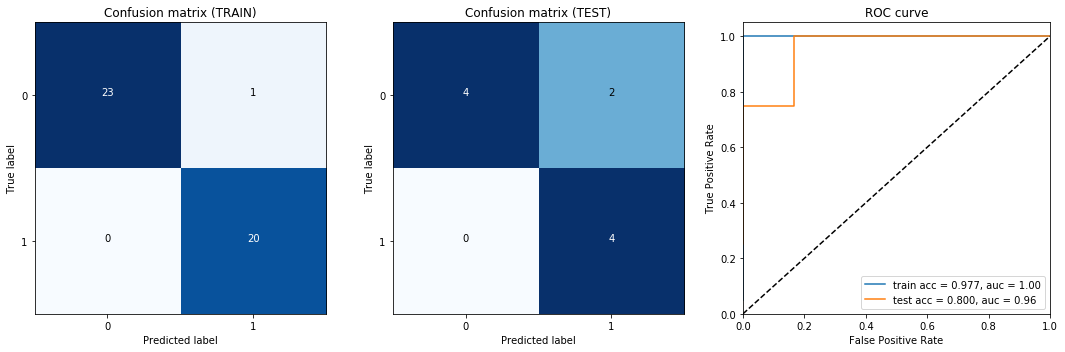

MODEL: RF accuracy:  0.8148148148148144 +/-: 0.016884898366379845
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.83      0.83      0.83        30
          1       0.79      0.79      0.79        24

avg / total       0.81      0.81      0.81        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


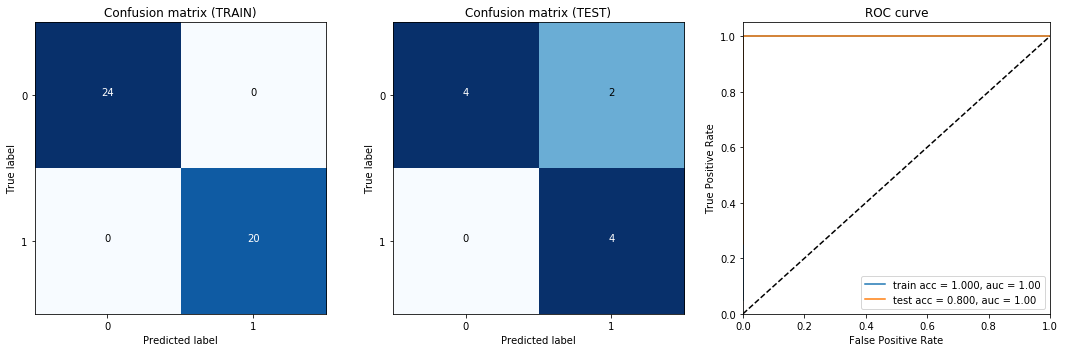

MODEL: RF accuracy:  0.7777777777777776 +/-: 0.01526374859708193
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.78      0.83      0.81        30
          1       0.77      0.71      0.74        24

avg / total       0.78      0.78      0.78        54

++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (54, 524) and class vector (54,)


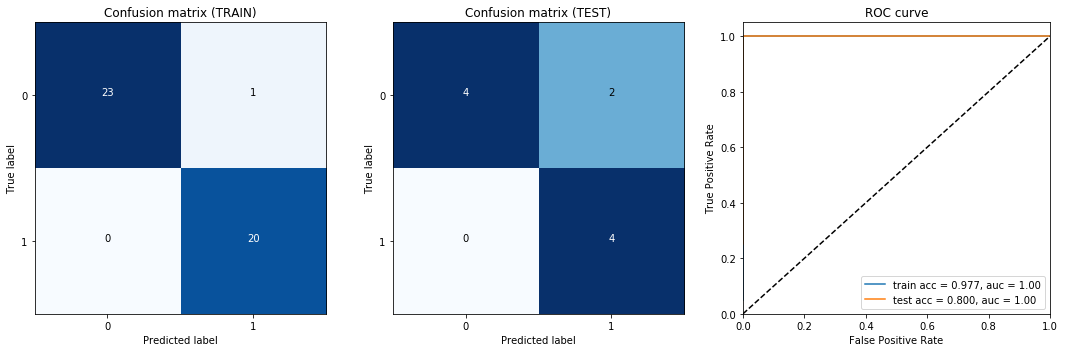

MODEL: RF accuracy:  0.796296296296296 +/-: 0.011366753959346556
++++++++++++++++++++++++++++++  Report ++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.81      0.83      0.82        30
          1       0.78      0.75      0.77        24

avg / total       0.80      0.80      0.80        54

++++++++++++++++++++++++++++++++++++++++++++++++++


In [45]:
Rocket.X_GENOME = None
Rocket.Y_CLASS = None
Rocket.PREP_HASH = None

RUNS, MODELS, ACC = Rocket.run_classification(method_list = METHOD_LIST, 
                          num_run = 10,
                          pipeline = PIPELINE,
                          parameters = {}, 
                          features = 'genomic')

In [46]:
print("Accuracy on average: {} +- {}, median: {}+-{}".format(ACC.mean()[0], ACC.mean()[1], ACC.median()[0], ACC.median()[1]))
print("+"*40)
print(ACC)

Accuracy on average: 0.7925925925925923 +- 0.013320862950492581, median: 0.796296296296296+-0.012189799226836263
++++++++++++++++++++++++++++++++++++++++
        acc model       var
0  0.759259    RF  0.015950
1  0.796296    RF  0.011367
2  0.777778    RF  0.015264
3  0.796296    RF  0.011367
4  0.796296    RF  0.011367
5  0.814815    RF  0.013013
6  0.796296    RF  0.011367
7  0.814815    RF  0.016885
8  0.777778    RF  0.015264
9  0.796296    RF  0.011367


In [53]:
###########
###########
##Runs.append(AllResults)
final_df = pandas.DataFrame()

for idx, df in enumerate(RUNS):    
    df['run'] = idx
    final_df = final_df.append(df, ignore_index = True)
final_df[Rocket.MODEL_PARAMETERS['ID']] = final_df[Rocket.MODEL_PARAMETERS['ID']].astype(str)
final_df = final_df.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
final_df['pred']= pandas.to_numeric(final_df['pred'])
final_df_agg = final_df.groupby([Rocket.MODEL_PARAMETERS['ID'], 'method']).agg({'pred': [numpy.mean, numpy.median, numpy.std]})
final_df_agg = final_df_agg['pred'].groupby(by=Rocket.MODEL_PARAMETERS['ID']).agg({'mean': [numpy.mean, numpy.median, numpy.std]})['mean']
final_df.to_csv("out/patient_results_"+Rocket.SET_NAME+"_FDR0025.csv")
final_df_agg.to_csv("out/patient_results_agg_"+Rocket.SET_NAME+"_FDR0025.csv")

# Top genomes

In [59]:
top_weights, top_coeffs = _helpers.get_top_genes(MODELS=MODELS, n_max=5000, RexR=Rocket)


In [15]:
#top_coeffs.to_csv("out/coeffs_"+Rocket.SET_NAME+"_FDR_alpha005.csv")
#top_weights.to_csv("out/weights_"+Rocket.SET_NAME+"_FDR_alpha0005.csv")

,8_SVM,8_LR,MEAN,MEDIAN
1569566_at,-0.935915,-0.894093,-0.915004,-0.915004
1569566_at,-0.935915,-0.894093,-0.915004,-0.915004
230932_at,0.409112,0.388079,0.398596,0.398596
230932_at,0.409112,0.388079,0.398596,0.398596
225791_at,0.717438,0.758431,0.737934,0.737934
225791_at,0.717438,0.758431,0.737934,0.737934
227134_at,1.000000,1.000000,1.000000,1.000000
227134_at,1.000000,1.000000,1.000000,1.000000


In [60]:
top_weights

,0_RF,MEAN,MEDIAN
218862_at,1.000000,1.000000,1.000000
201105_at,0.836689,0.836689,0.836689
1569566_at,0.810458,0.810458,0.810458
205900_at,0.690983,0.690983,0.690983
232114_at,0.621489,0.621489,0.621489
218084_x_at,0.612593,0.612593,0.612593
1560625_s_at,0.591507,0.591507,0.591507
207688_s_at,0.589524,0.589524,0.589524
229380_at,0.543576,0.543576,0.543576
1556224_a_at,0.500191,0.500191,0.500191


## Connecting probesets to genomes

In [18]:
probe_list = top_weights.index.tolist()
probeset_col = 'Probe Set ID'
desc_list = ['Pathway','Gene Title', 'Gene Symbol', 'Chromosomal Location', 
             'EC', 'gene ontology biological process', 'gene ontology molecular function']
probeset_to_genome_map = _helpers._probeset_mapper(probeset_type = 'HG-U133',                                                    
                                                   mapping_file = None,
                                                   probeset_col = probeset_col,
                                                   description_list = desc_list,
                                                   probe_list = probe_list)


_helpers._probeset_mapper took 2.82 seconds to finish


In [19]:
probeset_to_genome_map

{'1569566_at': {'AGI': '---',
  'Alignments': 'chr4:37892744-37954428 (+) // 68.11 // p14',
  'Annotation Date': '30-Mar-16',
  'Annotation Description': 'This probe set was annotated using the Matching Probes based pipeline to a Entrez Gene identifier using 2 transcripts. // false // Matching Probes // A',
  'Annotation Notes': 'XR_945684 // refseq // 5 // Cross Hyb Matching Probes /// XR_945685 // refseq // 5 // Cross Hyb Matching Probes /// XR_925212 // refseq // 3 // Cross Hyb Matching Probes /// XR_925213 // refseq // 3 // Cross Hyb Matching Probes',
  'Annotation Transcript Cluster': 'ENST00000402522(9),OTTHUMT00000317444(9)',
  'Archival UniGene Cluster': 'Hs.203722',
  'Chromosomal Location': 'chr4p14',
  'EC': '---',
  'Ensembl': 'ENSG00000065882 /// OTTHUMG00000150302',
  'Entrez Gene': '23216',
  'FlyBase': '---',
  'Gene Ontology Biological Process': '0032880 // regulation of protein localization // inferred from electronic annotation /// 0043547 // positive regulation of G

# Visualise the top genomes

# Patient clustering

In [2]:
from math import*
#from scipy.dspatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from decimal import Decimal
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from time import time
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
#TransPosed = Rocket.DATA_all_samples.T # all microarrays, may be multiple per patient versus all probesets, may be multiple per genome
Normal = Rocket.DATA_merged_processed.loc[:, (Rocket.DATA_merged_processed.columns !='target') & 
                                             (Rocket.DATA_merged_processed.columns !='ID')]
#AllNormal = Rocket.DATA_merged
#probeset_weights = Rocket.get_probeset_weights(method = )

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Markov clustering

In [10]:
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'cosine', normalised = True, inflation = 2, minkowski_dim=1)
##### apply Markov clustering
#######################
# non-distributed, non-sparse version, only for small-sized problems (N is order 1000)
e = 2
r = 2 
epsilon = 1e-7
convergence = 0.001
num_iter = 10
Orientation = 'col' # columnwise or rowwise

# add loop
def add_loop(df_matrix, value=0): 
    for i in df_matrix.index:
        df_matrix.loc[i, i] = value
    return df_matrix
patient_sim = add_loop(patient_sim, 1)
patient_sim = patient_sim - epsilon

def normalise(sim, type = 'col'):
    if(type == 'col'):
        # column normalisation
        for variable in sim.keys():
            col_vec = sim[variable]
            sum_val = sum([p for p in col_vec])
            sim[variable] = sim[variable]/sum_val
    elif (type == 'row'):
        # row normalisation
        for variable in sim.keys():
            row_vec = sim.loc[variable, :]
            sum_val = sum([p for p in row_vec])
            sim.loc[variable,:] = sim.loc[variable,:]/sum_val
    return sim

# step E: expansion, get the nth power of the matrix
def expansion(sim):
    X = numpy.array(sim)
    VarList = sim.keys()
    if e == 1:
        return sim
    elif e > 1:        
        return pandas.DataFrame(numpy.linalg.matrix_power(X, e), index = VarList, columns = VarList)
     
# step I: inflation, per column raise by rth power and column normalise
def inflation(sim, type = 'col'):    
    if type == 'col':
        Axis = 0
    elif type == 'row':
        Axis = 1
    return sim.apply(lambda x: x**r/sum(x**r), axis = Axis)

# remove weak connections, values < epsilon
def clean(sim):
    return sim.applymap(lambda x:0 if x<epsilon else x)
    
def difference(old, new):
    # relative zeroes over entire array
    #return (new.apply(lambda x: numpy.ceil(x-epsilon)) - old.apply(lambda x: numpy.ceil(x-epsilon))).sum().sum()/len(old)**2    
    return abs(new - old).sum().sum()/len(old)**2    

#patient_sim = normalise(patient_sim, type = Orientation)
_sim_a = patient_sim
for i in range(0,num_iter):
    # repeat E and I until convergence, the row-wise elements form the clusters.
    _sim_b = clean(inflation(expansion(_sim_a), type = Orientation))
    _sim_a = normalise(_sim_a, type = Orientation)
    #if ((difference(_sim_a, _sim_b)) < convergence) & (i>0):
    #    print(difference(_sim_a, _sim_b))
    #    print("CONVERGED after ", i, " iterations")
    #    break;
    _sim_a = _sim_b

result_mcl = clean(_sim_b)
result_mcl.loc[result_mcl.loc['9827_corr2.CEL',:]>epsilon, '9827_corr2.CEL']

Series([], Name: 9827_corr2.CEL, dtype: float64)

## Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'pearson', normalised = False, inflation=1, minkowski_dim=1)
##### apply Affinity Propagation
#######################
X = numpy.array(patient_sim)
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
patient_clusters = patient_sim.keys()[cluster_centers_indices].values
patient_cluster_members = af.labels_
print("There are {} patient clusters".format(n_clusters))

There are 5 patient clusters


In [28]:
AggResults = Rocket.DATA_merged
AggResults = _helpers._preprocess(AggResults, Rclass = Rocket)
#AggResults = _helpers._group_patients(AggResults, method = 'mean')
AggResults['cluster_ap'] = patient_cluster_members

#AggResults.groupby(['Treatment risk group in ALL10', 'cluster_ap']).agg({'Microarray file': pandas.Series.nunique})


In [11]:
AggResults['FU_RFS'] = pandas.to_numeric(AggResults['FU_RFS'])
AggResults['FU_EFS'] = pandas.to_numeric(AggResults['FU_EFS'])
AggResults['FU_OS'] = pandas.to_numeric(AggResults['FU_OS'])
AggResults['WhiteBloodCellcount'] = pandas.to_numeric(AggResults['WhiteBloodCellcount'])
AggResults['Age'] = pandas.to_numeric(AggResults['Age'])
AggResults['Gender'] = pandas.to_numeric(AggResults['Gender'])
AggResults['code_RFS']= pandas.to_numeric(AggResults['code_RFS'])
AggResults['code_EFS']= pandas.to_numeric(AggResults['code_EFS'])
AggResults['code_OS']= pandas.to_numeric(AggResults['code_OS'])

AggResults['mutations_NOTCH_pathway'] = pandas.to_numeric(AggResults['mutations_NOTCH_pathway'])
AggResults['mutations_PTEN_AKT_pathway'] = pandas.to_numeric(AggResults['mutations_PTEN_AKT_pathway'])
AggResults['mutations_IL7R_pathway'] = pandas.to_numeric(AggResults['mutations_IL7R_pathway'])
#AggResults.replace(to_replace=9999, value=0.5, inplace=True)
AggResults[['mutations_NOTCH_pathway', 
            'mutations_PTEN_AKT_pathway', 
            'mutations_IL7R_pathway']] = AggResults[['mutations_NOTCH_pathway', 
                                                    'mutations_PTEN_AKT_pathway', 
                                                    'mutations_IL7R_pathway']].replace([9999],[numpy.nan],
                                                                                       inplace=False)

c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [12]:
AggResults['comb_mutations_NOTCH_IL7R'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_NOTCH_PTEN'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_PTEN_AKT_pathway']
AggResults['comb_mutations_IL7R_PTEN'] =  AggResults['mutations_PTEN_AKT_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_IL7R_PTEN_NOTCH'] =  AggResults['mutations_PTEN_AKT_pathway']\
                                                + AggResults['mutations_IL7R_pathway']\
                                                + AggResults['mutations_NOTCH_pathway']


patient_count = AggResults.groupby(['cluster_ap']).agg({'labnr_patient': pandas.Series.nunique})
Clustered_by_patients_whitebloodcells = AggResults[AggResults['WhiteBloodCellcount'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'WhiteBloodCellcount': numpy.mean,
    'Age': numpy.mean, 
    'Gender': numpy.mean})

# Cancer_gene
# Treatment_protocol
# Treatment_risk_group_in_ALL_10

Clustered_by_patients_CODE = AggResults.groupby(['cluster_ap']).agg(
    {'code_RFS': numpy.mean, 
     'code_EFS': numpy.mean,
     'code_OS': numpy.mean})

Clustered_by_patients_FU_RFS = AggResults[AggResults['FU_RFS'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'FU_RFS': numpy.median, 
     'FU_EFS': numpy.median,
     'FU_OS': numpy.median})
Clustered_by_patients_NotchPath = AggResults[AggResults['mutations_NOTCH_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_NOTCH_pathway': numpy.mean})
Clustered_by_patients_IL7RPath = AggResults[AggResults['mutations_IL7R_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_IL7R_pathway': numpy.mean})
Clustered_by_patients_PTENAKTPath = AggResults[AggResults['mutations_PTEN_AKT_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_PTEN_AKT_pathway': numpy.mean})
Clustered_by_patients_comb_NOTCH_IL7R = AggResults[AggResults['comb_mutations_NOTCH_IL7R'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_IL7R': numpy.mean})
Clustered_by_patients_comb_NOTCH_PTEN = AggResults[AggResults['comb_mutations_NOTCH_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN = AggResults[AggResults['comb_mutations_IL7R_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN_NOTCH = AggResults[AggResults['comb_mutations_IL7R_PTEN_NOTCH'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN_NOTCH': numpy.mean})


c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
cluster_agg = pandas.merge(Clustered_by_patients_whitebloodcells, Clustered_by_patients_CODE, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN_NOTCH, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_IL7R, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_PTEN, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_FU_RFS, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_IL7RPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_NotchPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_PTENAKTPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, patient_count, how='inner', left_index=True, right_index=True)


In [ ]:
print("Cluster centers:",patient_sim.keys()[cluster_centers_indices].values)
print(patient_cluster_members)

plt.close('all')
plt.figure(figsize=(14,9))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = patient_cluster_members == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', 
             label = patient_sim.keys()[cluster_centers_indices[k]])
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.legend()
        
plt.title('Estimated number of clusters from Affinity Propagation: %d' % n_clusters)
plt.show()

In [19]:
##### CREATE graph from similarity matrix
##################
# nodes
VarList = TransPosed.keys()
nodes = []
node_index = 0
for patient_name in VarList:
    nodes.append((node_index, {'name': patient_name}))
    node_index = node_index + 1

edges = []
# edges
patient_sim = patient_similarity(Normal, sim_type = 'pearson', normalised = True, inflation=2)
node_index_x = 0
node_index_y = 0
for patient_name_x in VarList:
    for patient_name_y in VarList:        
        edges.append((node_index_x, node_index_y, patient_sim.iloc[node_index_x, node_index_y]))
        node_index_y = node_index_y + 1
    node_index_x = node_index_x + 1
    node_index_y = 0

In [20]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges, weight = 'weight')

c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

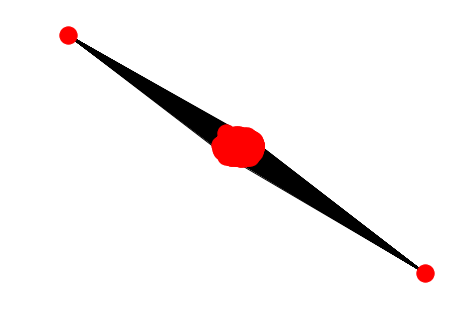

In [23]:
##### apply Spring-force
#######################
pos = nx.spring_layout(G, k = None, dim = 3, scale = 1.0)
nx.draw_spring(G, k = 30, dim = 2, scale = 1.0, iterations =1500)
plt.show()

In [ ]:
##### APPLY community detector
# maximize betweenness and modularity
##################################


In [12]:
##### LOAD IN DATA
###################
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# 